In [26]:
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt

In [30]:
Mdnadict = {}
Ednadict = {}
Ebptfdict = {}
EnoBdnadict = {}
EnoBphddict = {}
phd_dict = {}
bptf_dict = {}

for i in np.arange(0,24):
    Mdnadict[str(i)] = np.loadtxt('./H4_dna_contacts_nucleosome/'+str(295+i)+'_all.dat', unpack=True, usecols=(1), comments=('#'))
    EnoBdnadict[str(i)] = np.loadtxt('./H4_dna_contacts_phd/'+str(295+i)+'_all.dat', unpack=True, usecols=(1), comments=('#'))
    Ednadict[str(i)] = np.loadtxt('./H4_dna_contacts_bptf/'+str(295+i)+'_all.dat', unpack=True, usecols=(1), comments=('#'))

Mall = np.sum(Mdnadict[str(i)] for i in np.arange(0,24))
Ednall = np.sum(Ednadict[str(i)] for i in np.arange(0,24))
EnoBdnall = np.sum(EnoBdnadict[str(i)] for i in np.arange(0,24))



/var/folders/dy/rf4mxz6x6v97qwjpc9pp5yw40000gn/T/ipykernel_90166/475782855.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  Mall = np.sum(Mdnadict[str(i)] for i in np.arange(0,24))
/var/folders/dy/rf4mxz6x6v97qwjpc9pp5yw40000gn/T/ipykernel_90166/475782855.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  Ednall = np.sum(Ednadict[str(i)] for i in np.arange(0,24))
/var/folders/dy/rf4mxz6x6v97qwjpc9pp5yw40000gn/T/ipykernel_90166/475782855.py:16: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  EnoBdnall = np.sum(EnoBdnadict[str(i)] for i in np.arange(0,24))


In [31]:
# Prints total contacts for H4 residues 1 through 30

print('M has '+str(np.round(Mall.mean(), decimals=0))+'+/-'+str(np.round(stat.stdev(Mall)/2.2, decimals=0))+' tail-NCP contacts.')

print('EnoB has '+str(np.round(EnoBdnall.mean(), decimals=0))+'+/-'+str(np.round(stat.stdev(EnoBdnall)/2.2, decimals=0))+' tail-NCP contacts.')

print('E has '+str(np.round(Ednall.mean(), decimals=0))+'+/-'+str(np.round(stat.stdev(Ednall)/2.2, decimals=0))+' tail-NCP contacts.')



M has 110.0+/-26.0 tail-NCP contacts.
EnoB has 180.0+/-31.0 tail-NCP contacts.
E has 164.0+/-26.0 tail-NCP contacts.


In [41]:
def properror(a,b):
    c = a*a+b*b
    d = c**0.5
    return d

M1 = []
M1sterr = []
E1d = []
E1dsterr = []
EnoB1d = []
EnoB1dsterr = []

EnoBdif = []
EnoBdifer = []
Edif = []
Edifer = []
for i in np.arange(0,12):
    M1.append(stat.mean(Mdnadict[str(i)]))
    M1sterr.append(stat.stdev(Mdnadict[str(i)])/2.2)
    E1d.append(stat.mean(Ednadict[str(i)]))
    E1dsterr.append(stat.stdev(Ednadict[str(i)])/2.2)
    EnoB1d.append(stat.mean(EnoBdnadict[str(i)]))
    EnoB1dsterr.append(stat.stdev(EnoBdnadict[str(i)])/2.2)
    Edif.append(stat.mean(Ednadict[str(i)]) - stat.mean(Mdnadict[str(i)]))
    Edifer.append(properror(E1dsterr[i],M1sterr[i]))
    EnoBdif.append(stat.mean(EnoBdnadict[str(i)]) - stat.mean(Mdnadict[str(i)]))
    EnoBdifer.append(properror(EnoB1dsterr[i],M1sterr[i]))
M2 = []
M2sterr = []
E2d = []
E2dsterr = []
EnoB2d = []
EnoB2dsterr = []

for i in np.arange(12,24):
    M2.append(stat.mean(Mdnadict[str(i)]))
    M2sterr.append(stat.stdev(Mdnadict[str(i)])/2.2)
    E2d.append(stat.mean(Ednadict[str(i)]))
    E2dsterr.append(stat.stdev(Ednadict[str(i)])/2.2)
    EnoB2d.append(stat.mean(EnoBdnadict[str(i)]))
    EnoB2dsterr.append(stat.stdev(EnoBdnadict[str(i)])/2.2)
    Edif.append(stat.mean(Ednadict[str(i)]) - stat.mean(Mdnadict[str(i)]))
    Edifer.append(properror(E2dsterr[i-12],M2sterr[i-12]))
    EnoBdif.append(stat.mean(EnoBdnadict[str(i)]) - stat.mean(Mdnadict[str(i)]))
    EnoBdifer.append(properror(EnoB2dsterr[i-12],M2sterr[i-12]))


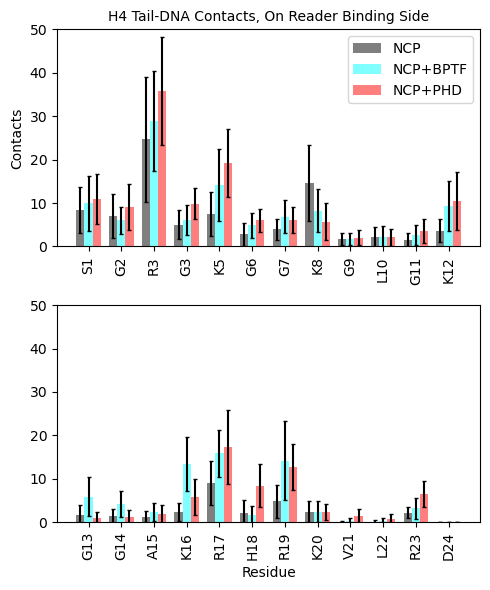

In [42]:
font = {'family': 'sans-serif',
        'color': 'black',
        'weight': 'bold',
        'size': 10,
        }

label1 = ['S1', 'G2', 'R3', 'G3', 'K5', 'G6', 'G7', 'K8', 'G9', 'L10', 'G11', 'K12']
label2 = ['G13', 'G14', 'A15', 'K16', 'R17', 'H18', 'R19', 'K20', 'V21', 'L22', 'R23', 'D24']

l1 = np.arange(1, 13, 1)
l2 = np.arange(1, 13, 1)

width = 0.25


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.0,6.0))


# Plot 1
ax1.bar(l1 - width, height=np.array(M1), yerr=np.array(M1sterr), width=width, label='NCP', color='black', alpha=0.5, capsize=1.5)
ax1.bar(l1, np.array(E1d), yerr=np.array(E1dsterr), width=width, label='NCP+BPTF', color='cyan', alpha=0.5, capsize=1.5)
ax1.bar(l1 + width, np.array(EnoB1d), yerr=np.array(EnoB1dsterr), width=width, label='NCP+PHD', color='red', alpha=0.5, capsize=1.5)
ax1.set_title('H4 Tail-DNA Contacts On Reader Binding Side', fontsize=10)
ax1.set_ylim(0, 50)
ax1.legend()
ax1.set_ylabel('Contacts')
ax1.set_xticks(ticks=l1, labels=label1, rotation='vertical', fontsize=10)

#Plot 2
ax2.bar(l2 - width, height=np.array(M2), yerr=np.array(M2sterr), width=width, label='NCP', color='black', alpha=0.5, capsize=1.5)
ax2.bar(l2, np.array(E2d), yerr=np.array(E2dsterr), width=width, label='NCP+BPTF', color='cyan', alpha=0.5, capsize=1.5)
ax2.bar(l2 + width, np.array(EnoB2d), yerr=np.array(EnoB2dsterr), width=width, label='NCP+PHD', color='red', alpha=0.5, capsize=1.5)
ax2.set_xticks(ticks=l2, labels=label2, rotation='vertical', fontsize=10)
ax2.set_ylim(0, 50)
ax2.set_xlabel('Residue')

plt.tight_layout()
plt.savefig('h4tail_contacts.pdf')